In [1]:
# # Generate the data 
import pandas as pd
import numpy as np

# # parameters 
# num_rows = 3000

# np.random.seed(42)

# # function to help generate random gender 
# def random_gender():
#     return np.random.choice(['Male', 'Famale'])

# # generate random locatio 
# def random_location():
#     return np.random.choice(['Urban', 'Rural'])


# def random_product():
#     return np.random.choice(['A', 'B', 'C'])

# data = {
#     'customer_id': np.arange(28, 28 + num_rows),
#     'age': np.random.randint(18, 60, size=num_rows),
#     'gender': [random_gender() for  _ in range(num_rows)],
#     'location': [random_location() for _ in range(num_rows)],
#     'Purchase_history': np.random.randint(100, 1000, size=num_rows),
#     'loyality_program': np.random.choice([0, 1], size=num_rows),
#     'product_purchased': [random_product() for _ in range(num_rows)],
#     'browsing_history': np.random.randint(5, 50, size=num_rows),
#     'search_queries': np.random.randint(1, 20, size=num_rows),
#     'social_media_active': np.random.choice([0, 1, 2], size=num_rows),
#     'email_open_rate': np.random.uniform(0.0, 1.0, size=num_rows).round(2),
#     'avg_order_value': np.random.uniform(10.0, 200.0, size=num_rows).round(2)
# }

# df = pd.DataFrame(data)
# df.to_csv('Customer_data.csv', index=False)

In [2]:
cust_data = 'C:/Users/ISHMO_CT/Downloads/my-projects/SIMPLE_LIN_CLAS_ENV/LPEP/Customer_data.csv'

In [3]:
df = pd.read_csv(cust_data)

In [4]:
df.head()

,customer_id,age,gender,location,Purchase_history,loyality_program,product_purchased,browsing_history,search_queries,social_media_active,email_open_rate,avg_order_value
0,28,56,Famale,Urban,703,1,B,16,8,2,0.24,68.96
1,29,46,Famale,Rural,980,0,A,31,11,0,0.99,21.99
2,30,32,Male,Urban,842,0,A,34,6,1,0.95,24.21
3,31,25,Famale,Urban,177,1,C,25,11,1,0.56,57.83
4,32,38,Male,Urban,184,0,A,42,17,1,0.70,43.82


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          3000 non-null   int64  
 1   age                  3000 non-null   int64  
 2   gender               3000 non-null   object 
 3   location             3000 non-null   object 
 4   Purchase_history     3000 non-null   int64  
 5   loyality_program     3000 non-null   int64  
 6   product_purchased    3000 non-null   object 
 7   browsing_history     3000 non-null   int64  
 8   search_queries       3000 non-null   int64  
 9   social_media_active  3000 non-null   int64  
 10  email_open_rate      3000 non-null   float64
 11  avg_order_value      3000 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 281.4+ KB


In [6]:
df.isnull().sum()

customer_id            0
age                    0
gender                 0
location               0
Purchase_history       0
loyality_program       0
product_purchased      0
browsing_history       0
search_queries         0
social_media_active    0
email_open_rate        0
avg_order_value        0
dtype: int64

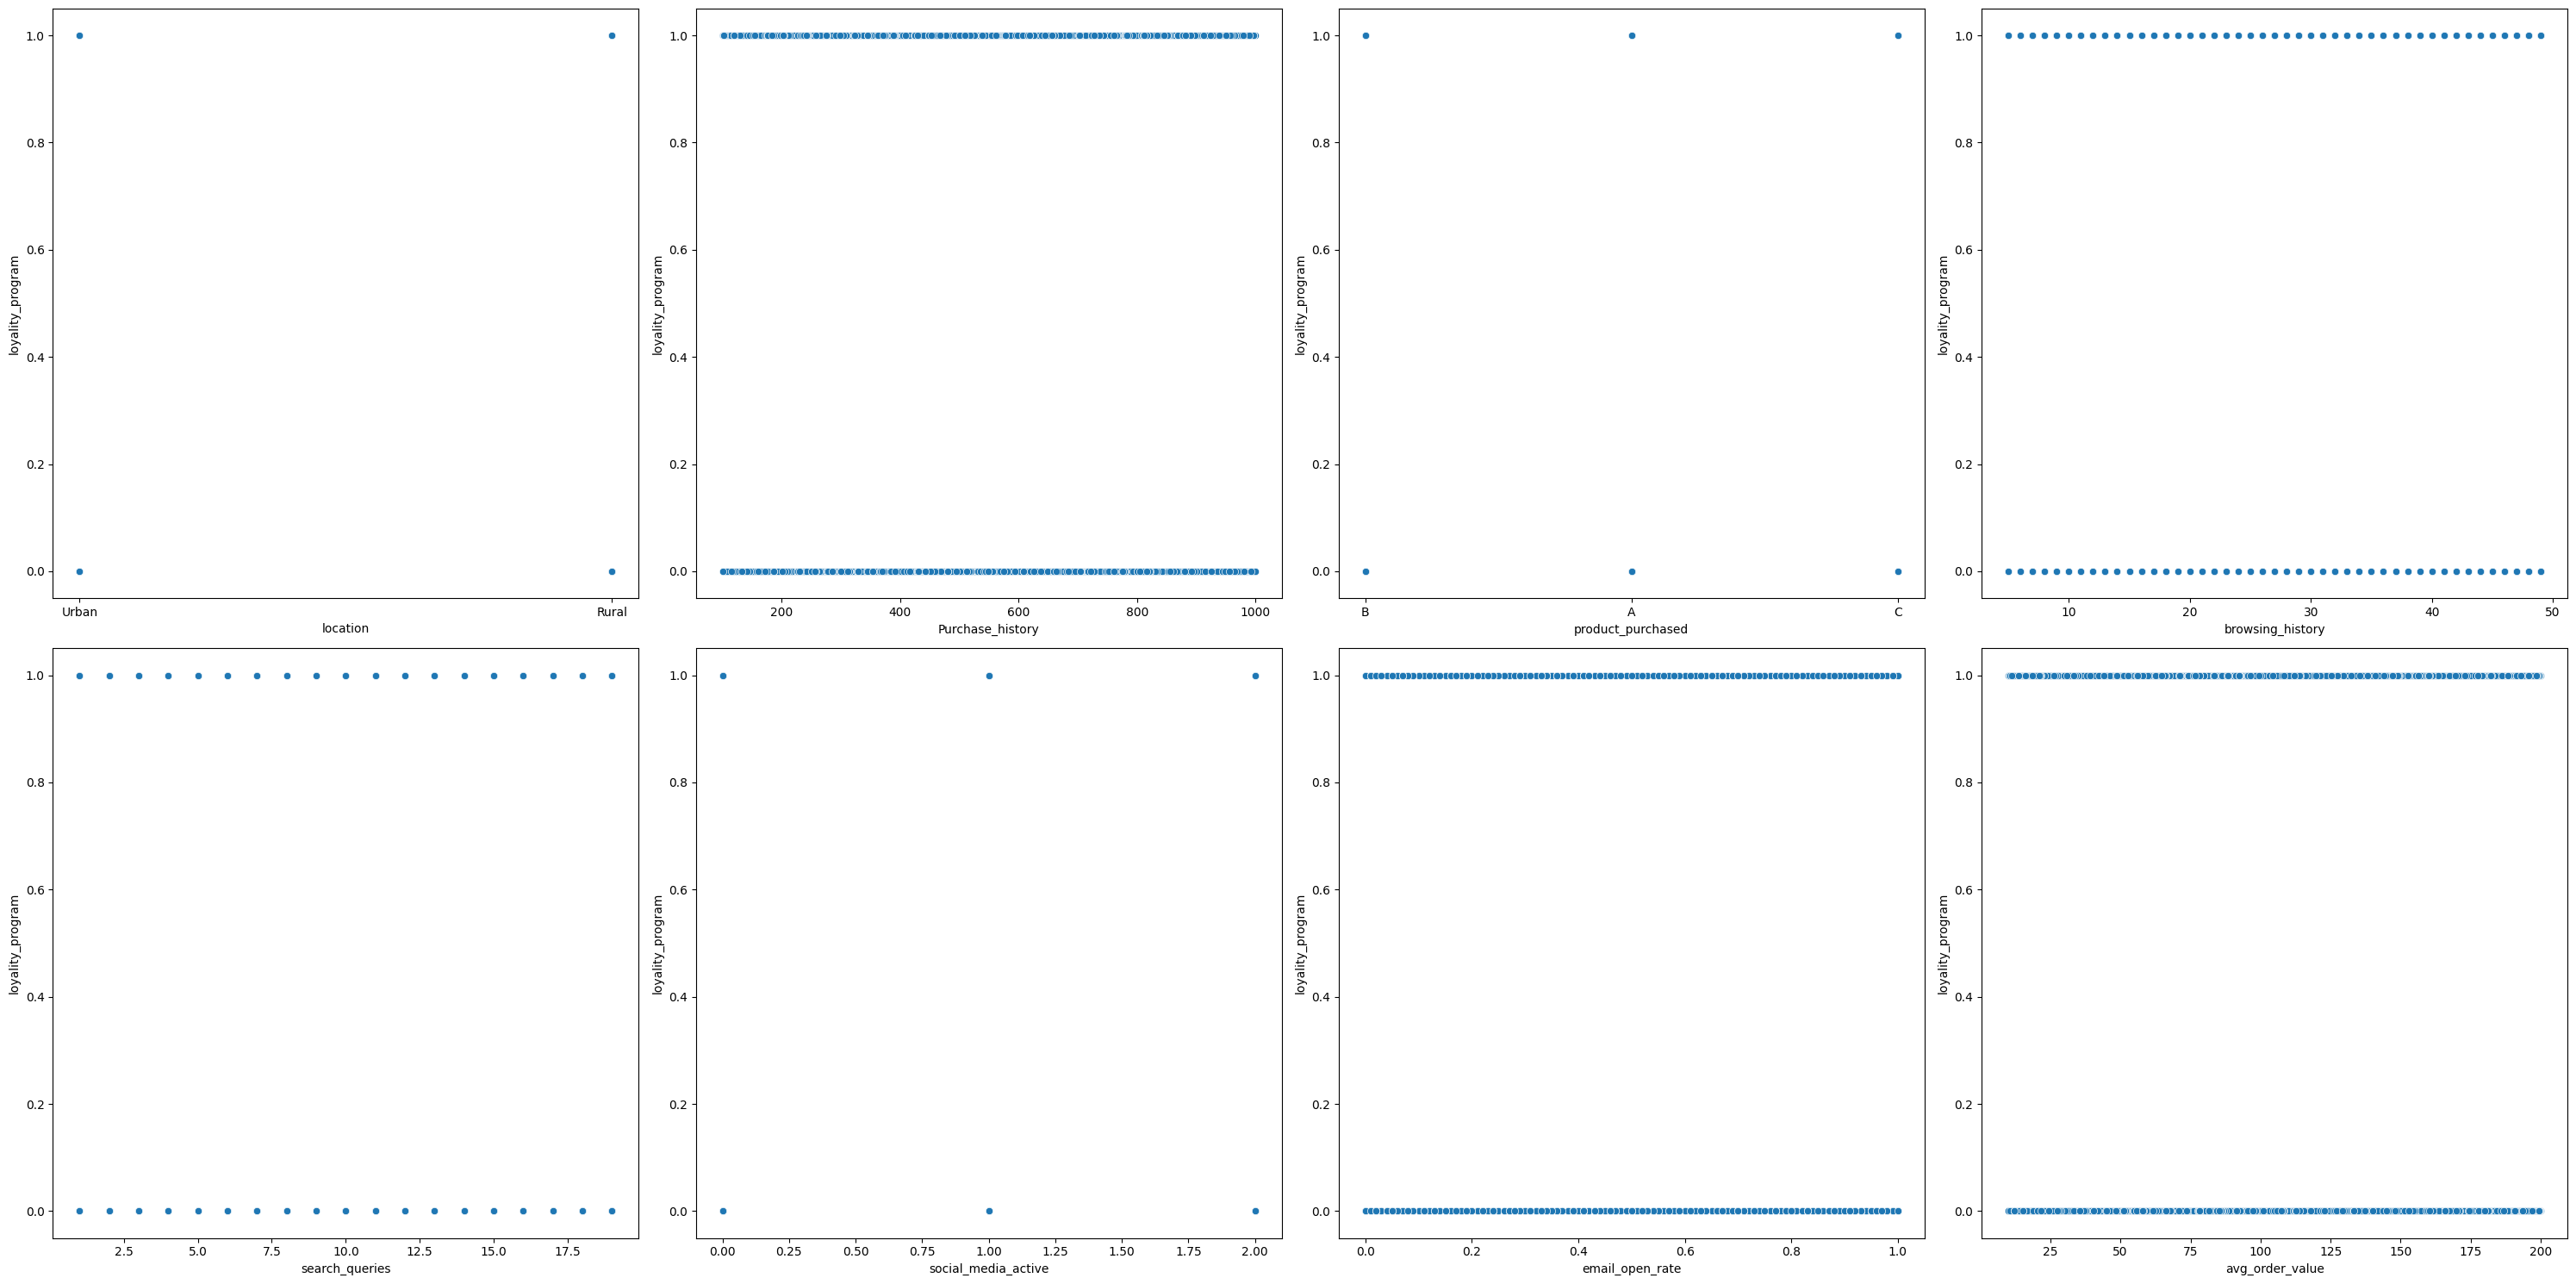

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))

# Create plots in each subplot
for i, x_var in enumerate(['location', 'Purchase_history', 'product_purchased', 'browsing_history', 'search_queries', 'social_media_active', 'email_open_rate', 'avg_order_value']):
    sns.scatterplot(x=df[x_var], y=df['loyality_program'], ax=axs[i//4, i%4])

plt.tight_layout()
plt.show()

In [8]:
# Split the data to target and features 
target = 'loyality_program'
y = df[target]
X=df.drop(columns=target)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Baseline 
basseline_acc = y_train.value_counts(normalize=True).max()
print(basseline_acc)

0.525


In [55]:
# Buils the models
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# z = w^T * x + b 
model_lr = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    LogisticRegression(),
)

model_rf = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestClassifier(),
)

model_dt = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(),
)

In [13]:
# Fit the models and train the model 
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_dt.fit(X_train, y_train)

c:\Users\ISHMO_CT\.virtualenvs\simple_lin_clas_env-CH65v0nb\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'location',
                                     'product_purchased'])),
                ('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [15]:
# Get the model accurancy 
model_lr_acc = model_lr.score(X_train, y_train)
model_rf_acc = model_rf.score(X_train, y_train)
model_dt_acc = model_dt.score(X_train, y_train)
print(model_lr_acc)
print(model_rf_acc)
print(model_dt_acc)

0.5295833333333333
1.0
1.0


In [16]:
# Accurancy in unseen data 
model_lr_acc = model_lr.score(X_test, y_test)
model_rf_acc = model_rf.score(X_test, y_test)
model_dt_acc = model_dt.score(X_test, y_test)
print(model_lr_acc)
print(model_rf_acc)
print(model_dt_acc)

0.5083333333333333
0.5316666666666666
0.485


In [44]:
# lets do some hyperprametering to improve these models 
param_grid_lr = {
    # 'logisticregression__penalty': ['l2', 'l1'],
    'logisticregression__penalty': [None, 'l2'],
    'logisticregression__max_iter': [500, 1000, 2000],
    # 'logisticregression__tol': [1e-4, 1e-6, 1e-8],
    # 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'logisticregression__multi_class': ['ovr', 'multinomial'],
}

param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 200, 500],
    'randomforestclassifier__criterion': ['gini', 'entropy'],
    'randomforestclassifier__max_depth': [5, 10, 15],
    # 'randomforestclassifier__max_features': [0.5, 0.75, 1.0],
}

param_grid_dt = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [5, 10, 15],
    # 'decisiontreeclassifier__max_features': [0.5, 0.75, 1.0],
}

Summary of Tuning:
C affects the regularization strength, helping to balance underfitting and overfitting.

penalty chooses the type of regularization (l1 for sparsity, l2 for all features).

max_iter and tol control convergence behavior and speed.

solver dictates the optimization method, impacting speed and compatibility with certain penalties.

multi_class handles multi-class classification strategies, depending on your problem setup.

Summary of Tuning:
n_estimators: Controls the number of trees; more trees usually improve performance at the cost of time.

criterion: Determines the splitting function; gini is faster, entropy might yield better splits.

max_depth: Limits tree depth to prevent overfitting; deeper trees capture more patterns but risk overfitting.

min_samples_split: Controls how many samples are required to split a node; higher values prevent small splits and overfitting.

min_samples_leaf: Ensures leaf nodes have enough samples to prevent overfitting.

max_features: Limits the number of features considered for each split; lower values reduce complexity and overfitting.

In [49]:
from sklearn.model_selection import GridSearchCV
model_lr_gs = GridSearchCV(model_lr, param_grid = param_grid_lr, n_jobs=-1, cv=5, verbose=1)
model_dt_gs = GridSearchCV(model_dt, param_grid = param_grid_dt, n_jobs=-1, cv=5, verbose=1)
model_rf_gs = GridSearchCV(model_rf, param_grid = param_grid_rf, n_jobs=-1, cv=5, verbose=1)

In [50]:
# fit and train 
model_lr_gs.fit(X_train, y_train)
model_dt_gs.fit(X_train, y_train)
model_rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\ISHMO_CT\.virtualenvs\simple_lin_clas_env-CH65v0nb\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ISHMO_CT\.virtualenvs\simple_lin_clas_env-CH65v0nb\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(cols=['gender',
                                                            'location',
                                                            'product_purchased'])),
                                       ('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': [5, 10, 15],
                         'randomforestclassifier__n_estimators': [100, 200,
                                                                  500]},
             verbose=1)

In [51]:
# find the best parameters 
print("best parameter_logistic regression", model_lr_gs.best_estimator_)
print("best parameter_rain forest", model_rf_gs.best_estimator_)
print("best parameter_decision_tree", model_dt_gs.best_estimator_)

best parameter_logistic regression Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'location',
                                     'product_purchased'])),
                ('simpleimputer', SimpleImputer()),
                ('logisticregression',
                 LogisticRegression(max_iter=500, multi_class='ovr',
                                    penalty=None))])
best parameter_rain forest Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'location',
                                     'product_purchased'])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        n_estimators=500))])
best parameter_decision_tree Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'location',
                                     'product_purchased'])),
   

In [57]:
model_lr_gs_best_param = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    LogisticRegression(max_iter=500, multi_class='ovr', penalty=None)
)

model_rf_gs_best_param = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500),
)

model_dt_gs_best_param = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(criterion='entropy', max_depth=5),
)

In [58]:
# fit and train 
model_lr_gs_best_param.fit(X_train, y_train)
model_dt_gs_best_param.fit(X_train, y_train)
model_rf_gs_best_param.fit(X_train, y_train)

c:\Users\ISHMO_CT\.virtualenvs\simple_lin_clas_env-CH65v0nb\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ISHMO_CT\.virtualenvs\simple_lin_clas_env-CH65v0nb\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'location',
                                     'product_purchased'])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        n_estimators=500))])

In [60]:
# Accurancy on triaini data using tuned models 
model_lr_acc_gs = model_lr_gs_best_param.score(X_train, y_train)
model_rf_acc_gs = model_dt_gs_best_param.score(X_train, y_train)
model_dt_acc_gs = model_rf_gs_best_param.score(X_train, y_train)
print(model_lr_acc_gs)
print(model_rf_acc_gs)
print(model_dt_acc_gs)

0.52625
0.5766666666666667
0.9570833333333333


In [61]:
# Accurancy on test data using tuned models 
model_lr_acc_gs = model_lr_gs_best_param.score(X_test, y_test)
model_rf_acc_gs = model_dt_gs_best_param.score(X_test, y_test)
model_dt_acc_gs = model_rf_gs_best_param.score(X_test, y_test)
print(model_lr_acc_gs)
print(model_rf_acc_gs)
print(model_dt_acc_gs)

0.5033333333333333
0.52
0.5316666666666666
